In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/ML_Self/placement.csv")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df.sample(5)

,cgpa,package
177,7.09,3.64
129,7.29,3.12
72,7.78,3.62
8,6.09,2.31
56,5.84,2.74


In [4]:
# preprocessing

print(df.isnull().sum())

for col in df.columns:
  if df[col].dtype == 'object':
    df.fillna({ col: df[col].mode()[0] }, inplace=True)
  else:
    df.fillna({ col: df[col].mean() }, inplace=True)

df

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

df

for col in df.columns:
  mean = df[col].mean()
  stddev = df[col].std()

  for i in range(len(df[col])):
    df.loc[i, col] = (df.loc[i, col] - mean) / stddev

df

cgpa       0
package    0
dtype: int64


,cgpa,package
0,-0.093977,0.381627
1,-1.749097,-1.469036
2,0.775662,0.367169
3,0.401624,0.974417
4,-0.047222,0.829834
...,...,...
195,-0.056573,-0.775037
196,-1.029073,-0.615996
197,0.205254,0.352710
198,0.597994,1.393708


In [5]:
X = df.drop("package", axis=1)
y = df['package']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

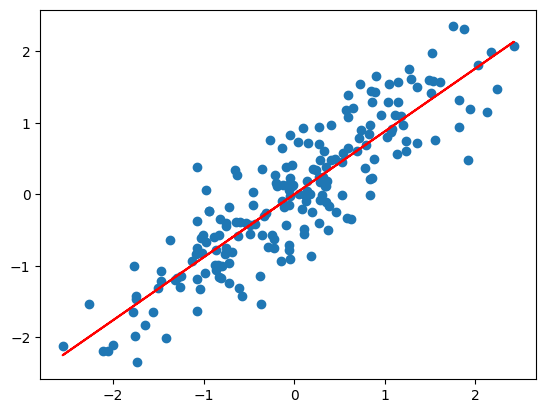

In [9]:
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")

In [10]:
class LR:
  def __init__(self):
    self.m = 0
    self.b = 0

  def fit(self, X, y):
    n = len(X)
    x_mean = X.mean()
    y_mean = y.mean()

    num = 0
    den = 0

    for i in range(n):
      x_int = (X.iloc[i,0] - x_mean)
      y_int = (y.iloc[i] - y_mean)

      num += x_int * x_int
      den += x_int * x_int

    self.m = num / den
    self.b = y_mean - (self.m * x_mean)

  def predict(self, X):
    return [(self.m * X.iloc[i,0]) + self.b for i in range(len(X))]

In [11]:
lr  = LR()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

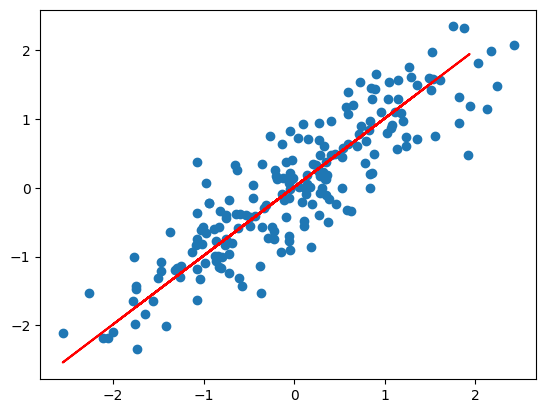

In [12]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')

In [13]:
class MLR:

  def __init__(self):
    self.coeff = []
    self.intercept = 0

  def fit(self, X, y):
    x = np.insert(X, 0, 1, axis=1)

    betas = np.linalg.inv(np.dot(x.T, x)).dot(x.T).dot(y)
    self.coeff = betas[1:]
    self.intercept = betas[0]

  def predict(self, X):
    return np.dot(X, self.coeff) + self.intercept

In [14]:
mlr = MLR()

mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

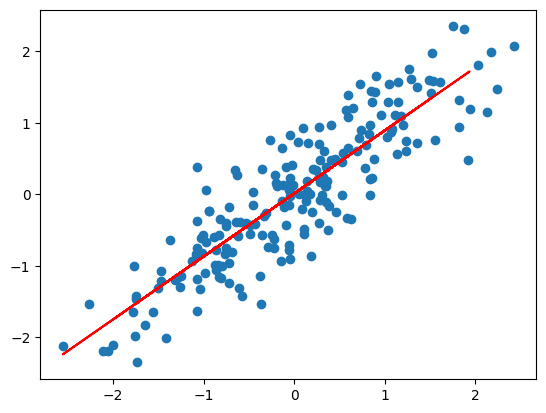

In [15]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')

In [38]:
class MLRGD:
  def __init__(self):
    self.coeff = []
    self.intercept = 0
    self.learning_rate = 0.1
    self.epochs = 2

  def fit(self, X, y):
    self.coeff = np.ones(X.shape[1])

    for i in range(self.epochs):
      y_pred = np.dot(X, self.coeff) + self.intercept

      slope_coeff = -2 * np.mean(y - y_pred)
      self.coeff -= self.learning_rate * slope_coeff

      slope_intercept = -2 * (np.dot((y - y_pred), X) / X.shape[0])
      self.intercept -= self.learning_rate * slope_intercept

  def predict(self, X):
    return np.dot(X, self.coeff) + self.intercept

In [39]:
mlr = MLRGD()

mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

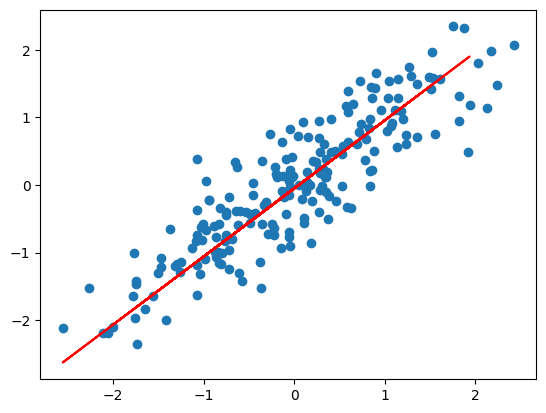

In [40]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')

In [60]:
class MLRSGD:
  def __init__(self):
    self.intercept = 0
    self.coeff = []
    self.learning_rate = 0.1
    self.epochs = 5

  def fit(self, X, y):
    self.coeff = np.ones(X.shape[1])

    for i in range(self.epochs):
      for j in range(X.shape[0]):
        idx = np.random.randint(0, X.shape[0])

        y_pred = np.dot(X.iloc[idx, 0], self.coeff) + self.intercept

        slope_coeff = -2 * (y.iloc[idx] - y_pred)
        self.coeff -= self.learning_rate * slope_coeff

        slope_intercept = -2 * np.dot((y.iloc[idx]-y_pred), X.iloc[idx,0])
        self.intercept -= self.learning_rate * slope_intercept

        break

    print(self.coeff)

  def predict(self, X):
    return np.dot(X, self.coeff) + self.intercept

In [61]:
mlr = MLRSGD()

mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

[0.95182565]


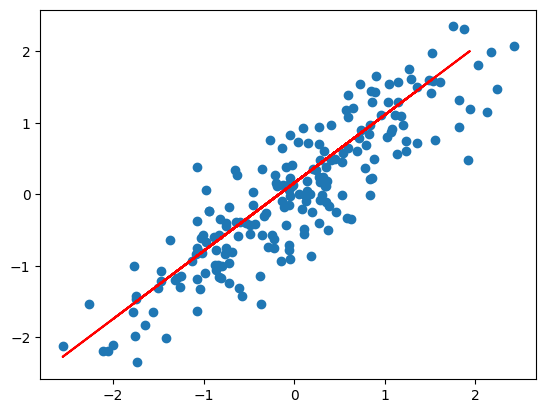

In [62]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')

In [82]:
import random

class MLRMBGD:
  def __init__(self):
    self.coeff = []
    self.intercept = 0
    self.learning_rate = 0.1
    self.epochs = 2
    self.batch_size = 5

  def fit(self, X, y):

    X = np.array(X)
    y = np.array(y)

    self.coeff = np.ones(X.shape[1])

    for i in range(self.epochs):
      for j in range(int(X.shape[0] / self.batch_size)):
        idx = random.sample(range(X.shape[0]), self.batch_size)

        y_pred = np.dot(X[idx], self.coeff) + self.intercept

        slope_coeff = -2 * np.mean(y[idx] - y_pred)
        self.coeff -= self.learning_rate * slope_coeff

        slope_intercept = -2 * np.dot((y[idx] - y_pred), X[idx])
        self.intercept -= self.learning_rate * slope_intercept
        break

  def predict(self, X):
    return np.dot(X, self.coeff) + self.intercept

In [83]:
mlr = MLRMBGD()

mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

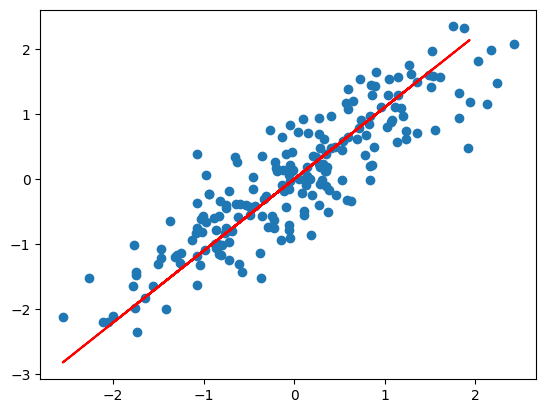

In [84]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')

In [98]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

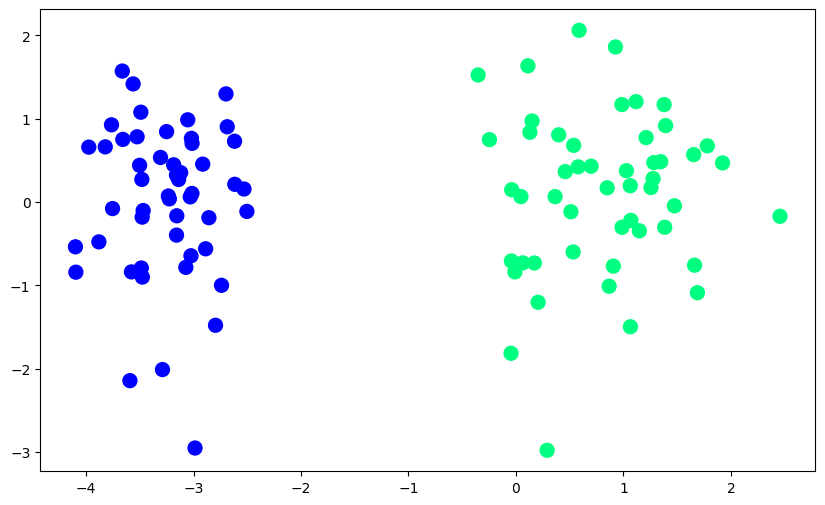

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter',s=100)

In [117]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

print(lr.coef_)
print(lr.intercept_)

[[2.36679363 0.02300492]]
[3.13571596]


In [118]:
m = -(lr.coef_[0][0] / lr.coef_[0][1])
b = -(lr.intercept_[0] / lr.coef_[0][1])

x_input = np.linspace(-3,3,100)
y_input = m * x_input + b

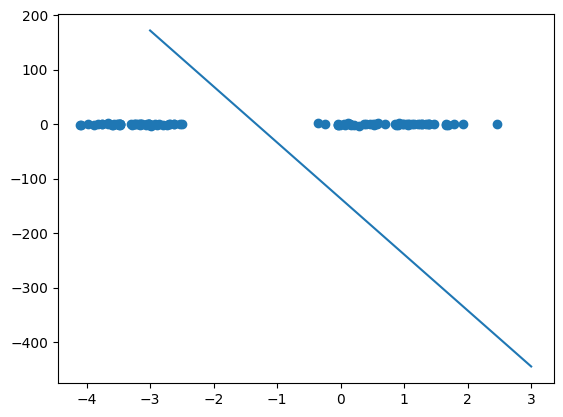

In [119]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot(x_input, y_input)

In [160]:
class LGR:

  def __init__(self):
    self.intercept = 0
    self.coef = []
    self.epochs = 100
    self.lr = 0.2

  def _sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])

    for i in range(X.shape[0]):
      idx = np.random.randint(0, X.shape[0])

      y_pred = self._sigmoid(np.dot(X[idx], weights))
      weights += self.lr * (y[idx] - y_pred) * X[idx]

      self.coef = weights[1:]
      self.intercept = weights[0]

In [161]:
lr = LGR()

lr.fit(X, y)

print(lr.coef)

[2.07101191 0.28504068]


In [162]:
m = -(lr.coef[0] / lr.coef[1])
b = -(lr.intercept / lr.coef[1])

x_input = np.linspace(-5,3,100)
y_input = m * x_input + b

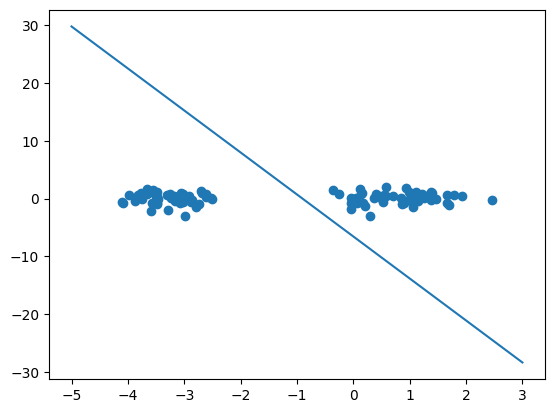

In [163]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot(x_input, y_input)

In [26]:
data = pd.read_csv("/content/drive/MyDrive/ML_Self/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
print(data['Species'].unique())

df = data
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
df

arr = []
for i in range(len(df)):
  if df.iloc[i, -1] == 0:
    arr.append(1)
  else:
    arr.append(0)

df['setosa'] = arr
df

arr = []
for i in range(len(df)):
  if df.iloc[i, -2] == 1:
    arr.append(1)
  else:
    arr.append(0)

df['versicolor'] = arr
df

arr = []
for i in range(len(df)):
  if df.iloc[i, -3] == 2:
    arr.append(1)
  else:
    arr.append(0)

df['virginica'] = arr
df

df.sample(25)

[0 1 2]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,setosa,versicolor,virginica
145,146,6.7,3.0,5.2,2.3,2,0,0,0
109,110,7.2,3.6,6.1,2.5,2,0,0,0
99,100,5.7,2.8,4.1,1.3,1,1,1,0
140,141,6.7,3.1,5.6,2.4,2,0,0,0
71,72,6.1,2.8,4.0,1.3,1,1,1,0
55,56,5.7,2.8,4.5,1.3,1,1,1,0
141,142,6.9,3.1,5.1,2.3,2,0,0,0
96,97,5.7,2.9,4.2,1.3,1,1,1,0
115,116,6.4,3.2,5.3,2.3,2,0,0,0
103,104,6.3,2.9,5.6,1.8,2,0,0,0


In [55]:
x = df.iloc[:, 1:-4]
y = df.iloc[:, -3:]

x

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print(X_train, X_test, y_train, y_test)

In [60]:
class MLGR:

  def __init__(self):
    self.w = []
    self.lr = 0.1
    self.epochs = 100

  def softmax(self, z):
    nr = np.exp(z)
    dr = np.sum(nr, axis=1, keepdims=True)
    return nr/dr

  def fit(self, X, y):
    n,m = x.shape
    classes = y.shape[1]

    self.W = np.random.randn(m, classes)

    for i in range(self.epochs):
      y_pred = self.softmax(np.dot(X, self.W))
      self.W -= self.lr * ((1/n) * np.dot(X.T, (y_pred - y)))

  def predict(self, X):
    y_pred = self.softmax(np.dot(X, self.W))
    return np.argmax(y_pred, axis=1)

In [61]:
mlr = MLGR()

mlr.fit(X_train, y_train)

In [67]:
y_pred = mlr.predict(X_test)
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(accuracy)

0.6666666666666666


In [72]:
from sklearn import datasets
iris = datasets.load_iris()
X , y = iris.data, iris.target

In [73]:
X_train, X_test , y_train, y_test = train_test_split(X , y , test_size = 0.4 , random_state = 42)

In [94]:
from collections import Counter

class KNN:

  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    return [self._predict(x) for x in X]

  def _ed(self, x1, x2):
    return np.sqrt(np.sum((x1-x2) ** 2))

  def _predict(self, x):
    distances = [self._ed(x, x_train) for x_train in self.X_train]

    k_best_idx = np.argsort(distances)[:self.k]
    labels = [self.y_train[i] for i in k_best_idx]

    mc = Counter(labels).most_common()
    return mc[0][0]

In [95]:
knn = KNN(9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_pred)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1]


In [96]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv("/content/GSPC_2011.csv")

class QLearningAgent:
    def __init__(self, n_days, learning_rate=0.1, discount_factor=0.9, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01):
        self.n_days = n_days
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.q_table = {}

    def get_state(self, prices):
        return tuple([(p,) for p in prices])

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon: # exploration
            return random.choice(["buy", "sell", "hold"])
        else:
            if state not in self.q_table:
                self.q_table[state] = {"buy": 0, "sell": 0, "hold": 0}
            return max(self.q_table[state], key=self.q_table[state].get)

    def update_q_value(self, state, action, reward, next_state):
        if state not in self.q_table:
            self.q_table[state] = {"buy": 0, "sell": 0, "hold": 0}
        if next_state not in self.q_table:
            self.q_table[next_state] = {"buy": 0, "sell": 0, "hold": 0}

        old_value = self.q_table[state][action]
        next_max = max(self.q_table[next_state].values())

        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max)
        self.q_table[state][action] = new_value

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)


def simulate_trading(data, agent, episodes=100):
    profit_history = []
    for episode in range(episodes):
        print(f"Episode {episode + 1}/{episodes}")

        total_profit = 0
        holding_stock = False
        buy_price = 0

        for i in range(agent.n_days, len(data) - 1):
            state = agent.get_state(data[i - agent.n_days:i])
            action = agent.choose_action(state)

            if action == "buy" and not holding_stock:
                holding_stock = True
                buy_price = data[i]
                reward = 0

            elif action == "sell" and holding_stock:
                holding_stock = False
                profit = data[i] - buy_price
                total_profit += profit
                reward = profit

            elif action == "hold":
                reward = 0
            else:
                reward = -10

            # Update Q-values
            next_state = agent.get_state(data[i - agent.n_days + 1:i + 1])
            agent.update_q_value(state, action, reward, next_state)

        profit_history.append(total_profit)
        agent.decay_epsilon()
        print(f"Total profit: {total_profit}")
        print("-" * 30)

    return profit_history


def print_q_table(agent):
    rows = []
    for state, actions in agent.q_table.items():
        state_str = ', '.join([str(s[0]) for s in state])
        rows.append({"State": state_str, **actions})

    q_table_df = pd.DataFrame(rows)
    print(q_table_df)

if __name__ == "__main__":
    closing_prices = df['Close'].values

    n_days = 5
    agent = QLearningAgent(n_days=n_days)

    profit_history = simulate_trading(closing_prices, agent, episodes=200)
    print_q_table(agent)


FileNotFoundError: [Errno 2] No such file or directory: '/content/GSPC_2011.csv'